# IPASS
Thijs van den Berg - 1740697

NB. Bronvermelding is te vinden in de `README.md`

In [9]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt  # Voor de grafieken
import numpy as np  # Om data als arrays op te kunnen slaan en de normale verdeling te kunnen tekenen
from matplotlib import style  # Style van de grafiek aanpassen naar eigen smaak
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d as vorPlot
from scipy.stats import norm  # Om de lijn van de normale verdeling te tekenen. Getallen zijn zelf berekend.

style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]  # Grotere plots in Jupyter Notebook

<IPython.core.display.Javascript object>

### Normale Verdeling
Twee normale verdelingen worden geplot. Afstand tussen de toppen kan worden meegegeven. % Overlap

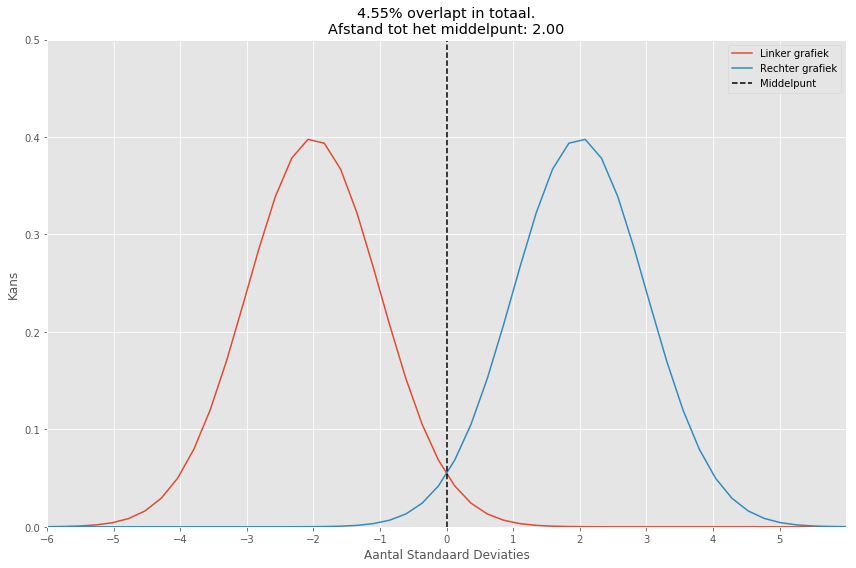

<IPython.core.display.Javascript object>

In [10]:
def percentageOverlap(middelpuntAfstand):
    return norm.cdf(-middelpuntAfstand) * 2 * 100  # Werkt alleen voor Standaard(!) Normale Verdeling

def normaleVerdeling(mu, sigma, totaleAfstand, labels):
    """Plot afgeleid van: Thijs van den Berg (Jun. 2019)
       https://github.com/Denbergvanthijs/AC-opdrachten/
       
       Mu en Sigma zijn vaak 0 resp. 1
       TotaleAfstand is de hemelsbrede afstand tussen twee objecten"""
    plt.clf()
    middelpuntAfstand = 0.5 * totaleAfstand
    totaleOverlap = percentageOverlap(middelpuntAfstand)

    lijn = np.linspace(-4 * sigma - middelpuntAfstand, 4 * sigma + middelpuntAfstand)  # De lijn van de normale verdelingen
    plt.plot(lijn, norm.pdf(lijn, mu - middelpuntAfstand, sigma), label=labels[0])  # De linker normale verdeling
    plt.plot(lijn, norm.pdf(lijn, mu + middelpuntAfstand, sigma), label=labels[1])  # De rechter normale verdeling
    plt.axvline(x=0, color="black", linestyle='--', label='Middelpunt')
    
    plt.xticks(np.arange(int(-4 * sigma - middelpuntAfstand), 4 * sigma + middelpuntAfstand, step=1))
    plt.xlim(-4 * sigma - middelpuntAfstand, 4 * sigma + middelpuntAfstand)
    plt.ylim(0, 0.5)
    plt.xlabel("Aantal Standaard Deviaties")
    plt.ylabel("Kans")
    plt.title(f"{totaleOverlap:.2f}% overlapt in totaal.\nAfstand tot het middelpunt: {middelpuntAfstand:.2f}")
    plt.legend()
    
    plt.tight_layout()  # Zodat ook de astitels op de grafieken passen
    plt.show()
    
normaleVerdeling(0, 1, 4, ["Linker grafiek", "Rechter grafiek"])

### Voronoi
Deze functie genereerd een Vonoroi-diagram. De rode punten zijn datapunten die met de invoer zijn meegegeven in een (n, 2)-array.  

(Bron: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html)

<Figure size 864x576 with 0 Axes>

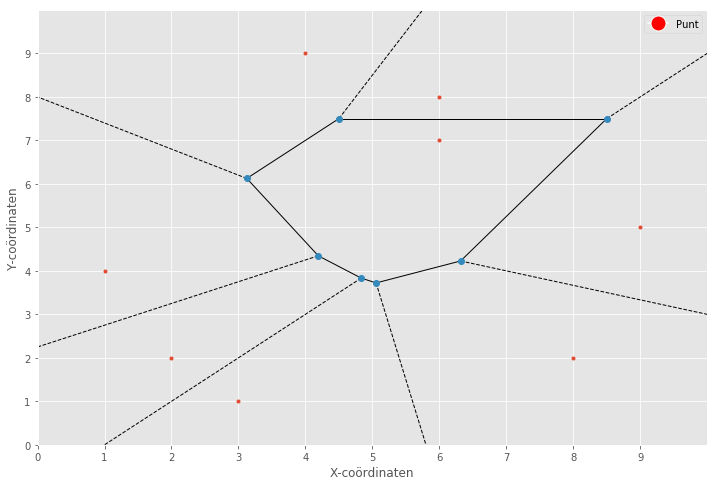

<IPython.core.display.Javascript object>

In [11]:
def plotVonoroi(punten):
    """Plot een Vonoroi-diagram ter grote van de maximale x en y-coördinaten."""
    plt.clf()
    vorPlot(Voronoi(punten))

    plt.xlim(0, max(punten[:, 0])+1)
    plt.ylim(0, max(punten[:, 1])+1)
    plt.xticks(np.arange(0, max(punten[:, 0])+1))
    plt.yticks(np.arange(0, max(punten[:, 1])+1))
    plt.xlabel("X-coördinaten")
    plt.ylabel("Y-coördinaten")
    plt.legend(handles=[mlines.Line2D([0], [0], marker='o', color='w', label='Punt',
                          markerfacecolor='r', markersize=15)])
    plt.show()


punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(10, size=(8, 2))

plotVonoroi(punten)

Door middel van $\sqrt{a^2+b^2} = \sqrt{c^2} = c$ kan de afstand van een punt tot het midden van de twee punten worden gevonden. Door het eerste punt van het middelpunt af te trekken en vervolgens $c$ te berekenen is de afstand berekend. Wanneer er een verhouding is opgesteld tussen de afstand en de standaard deviatie is vervolgens het overlappende gedeelte te berekenen.

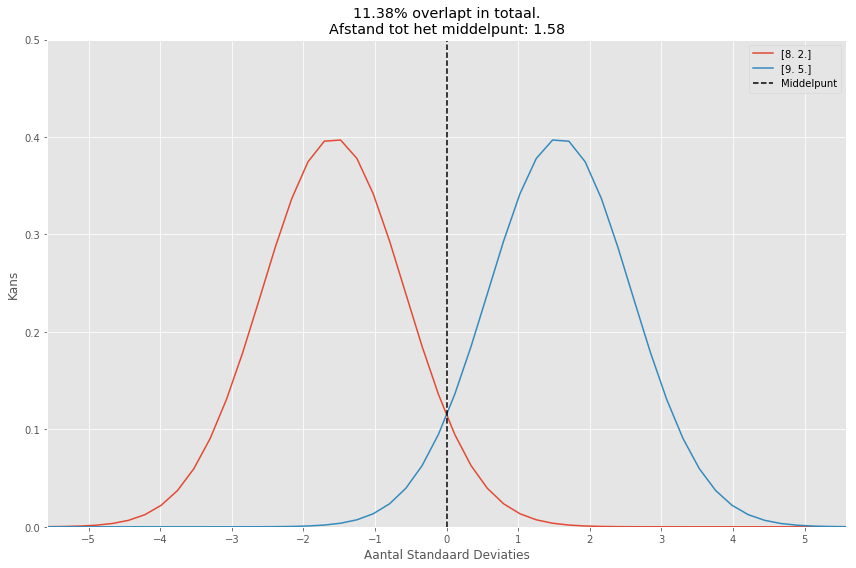

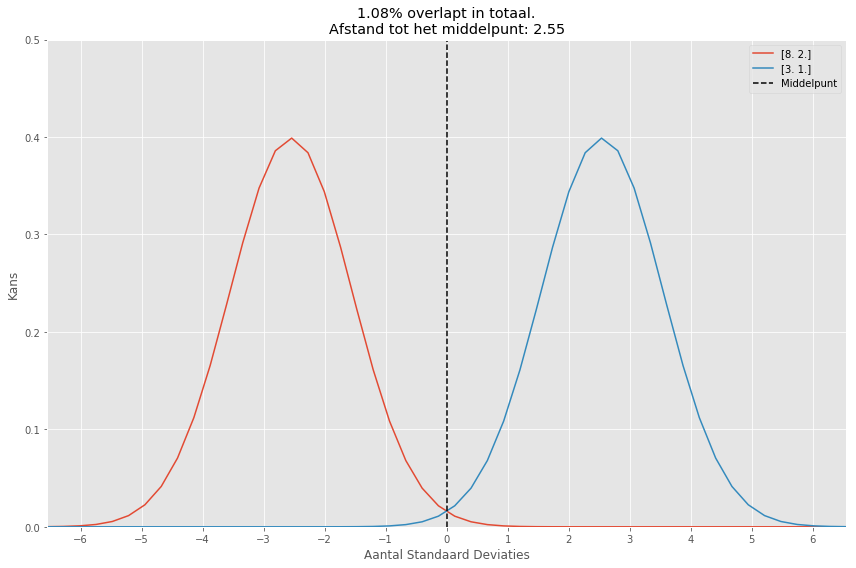

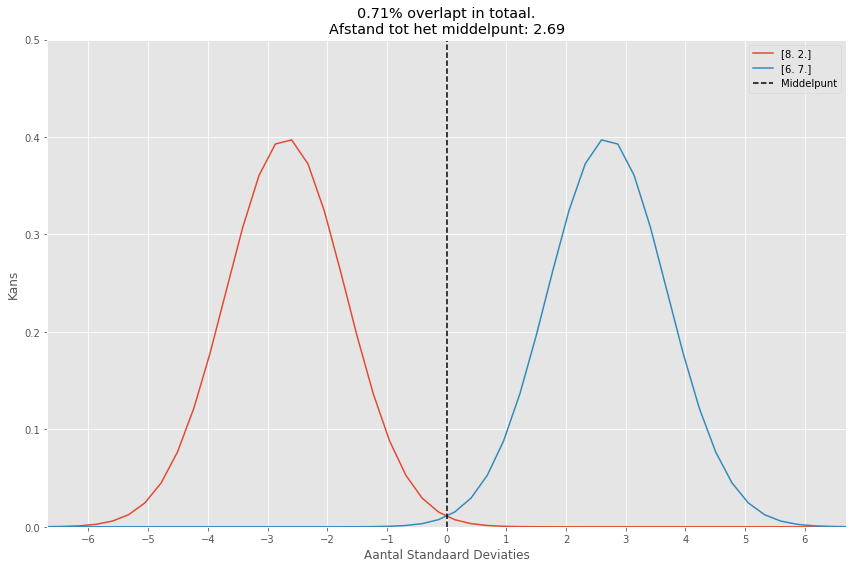

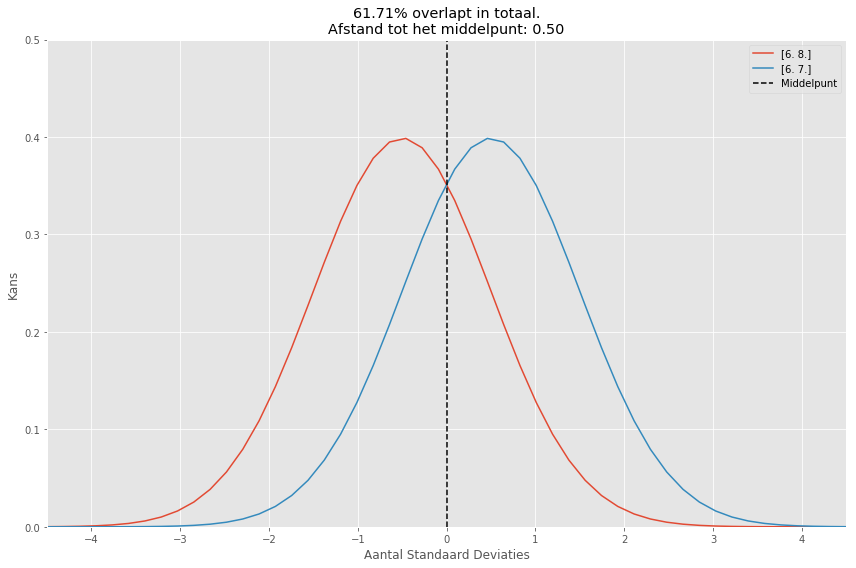

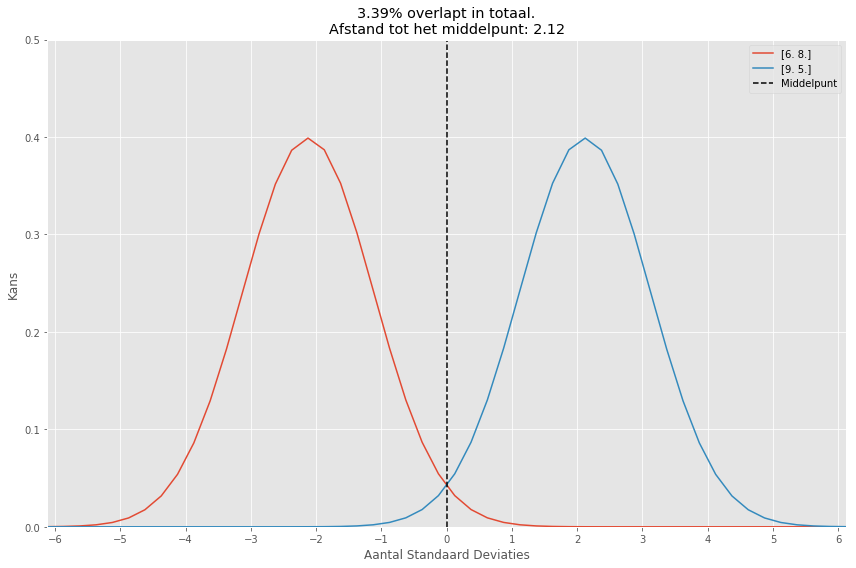

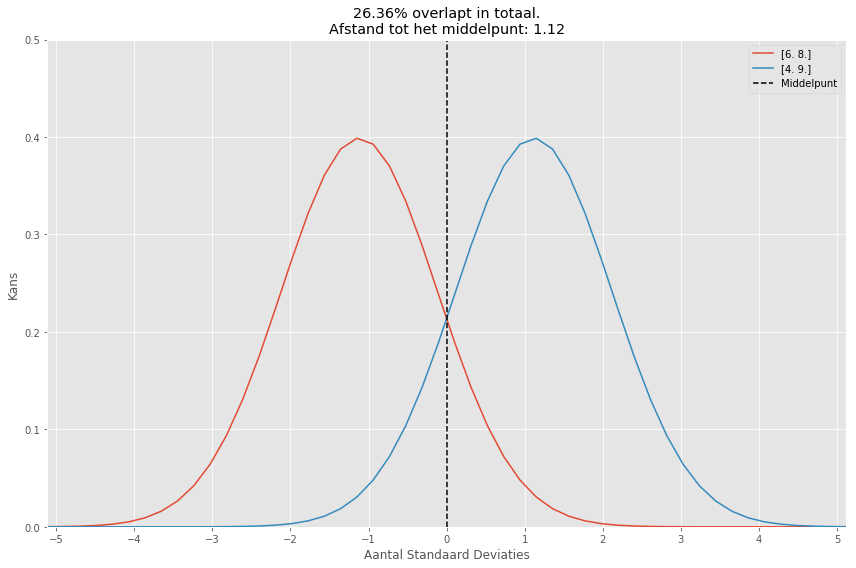

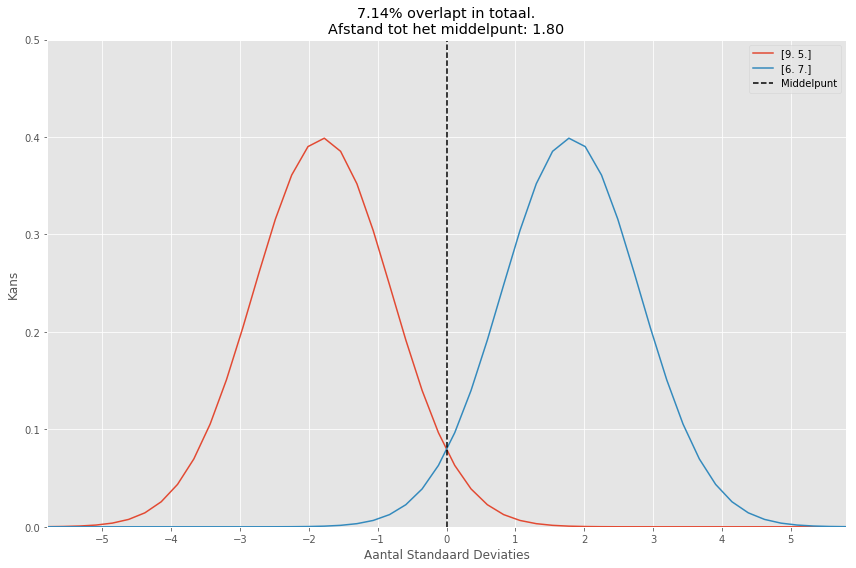

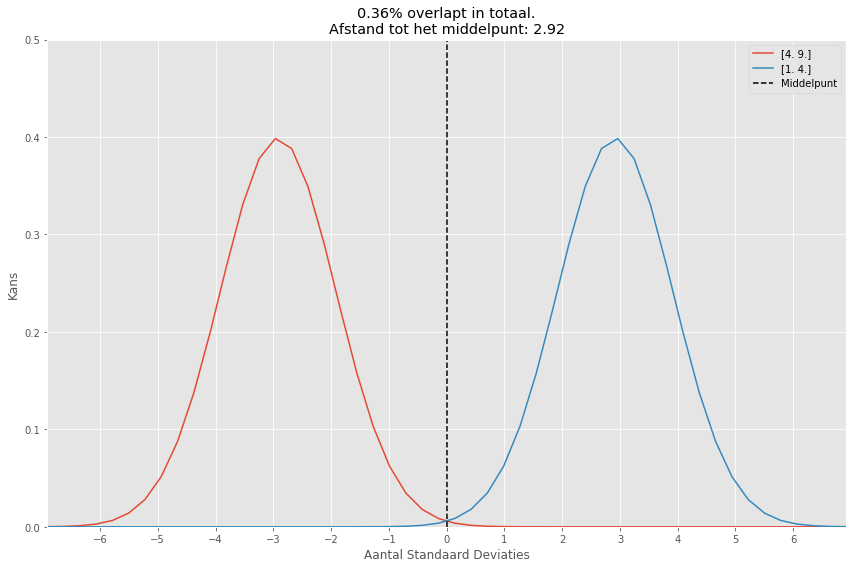

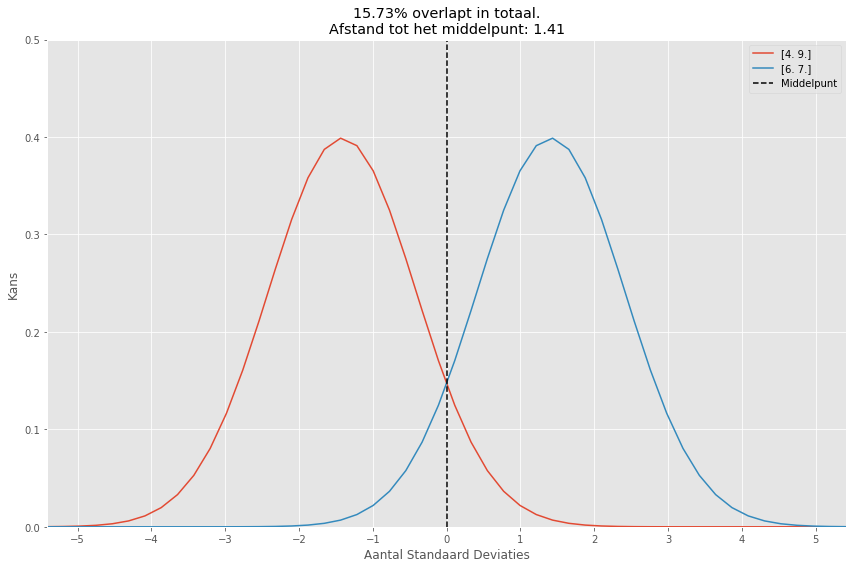

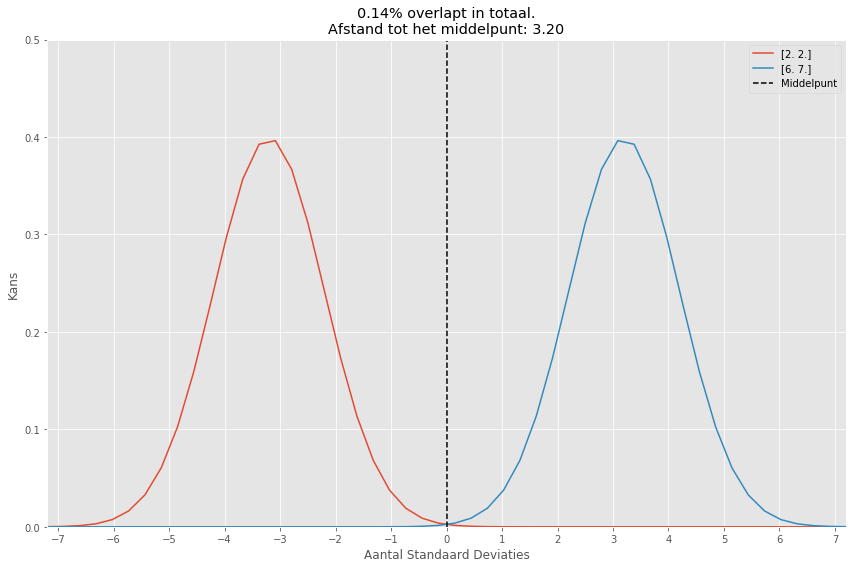

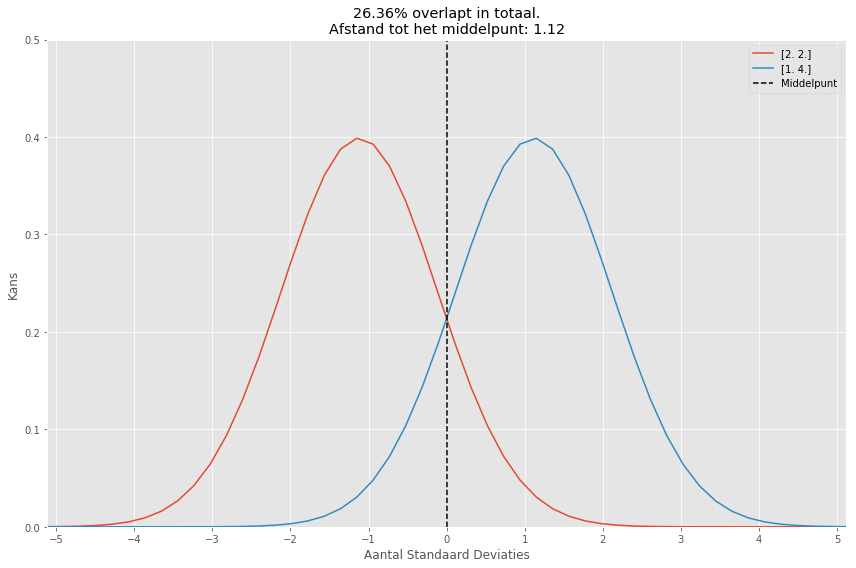

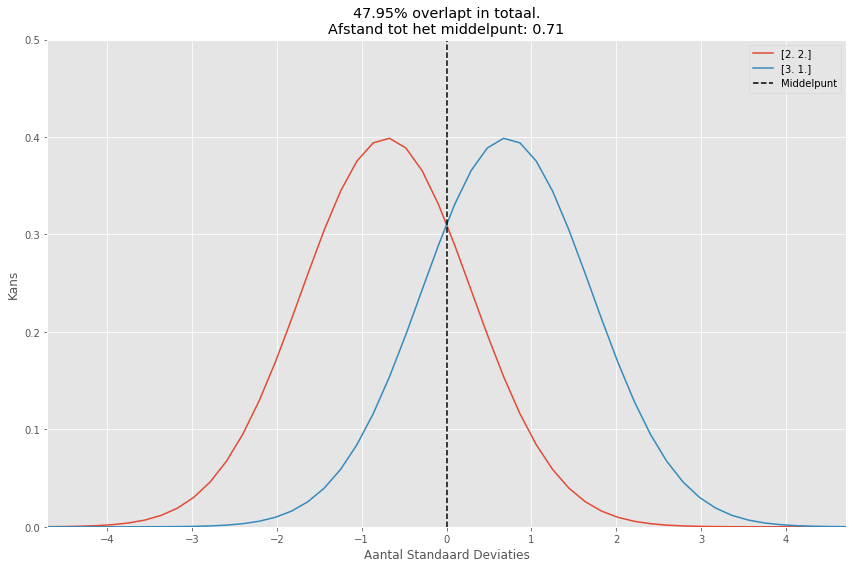

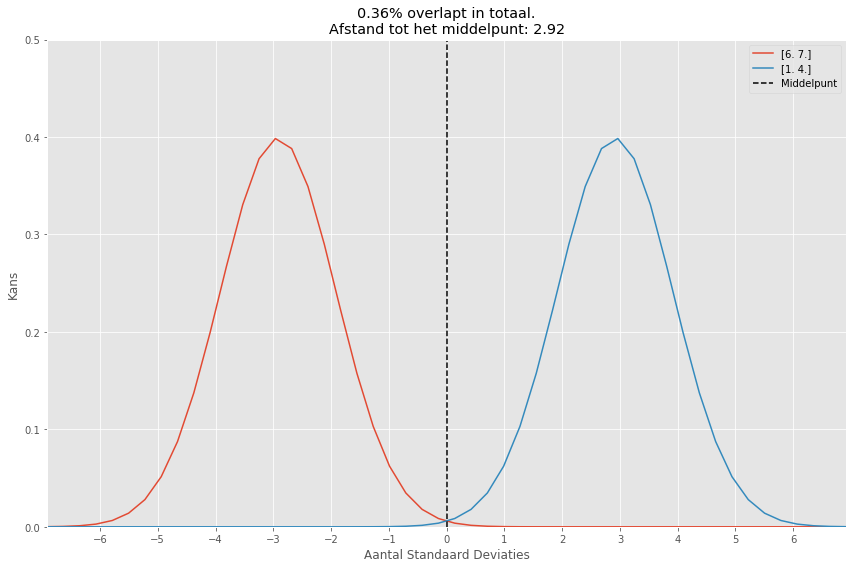

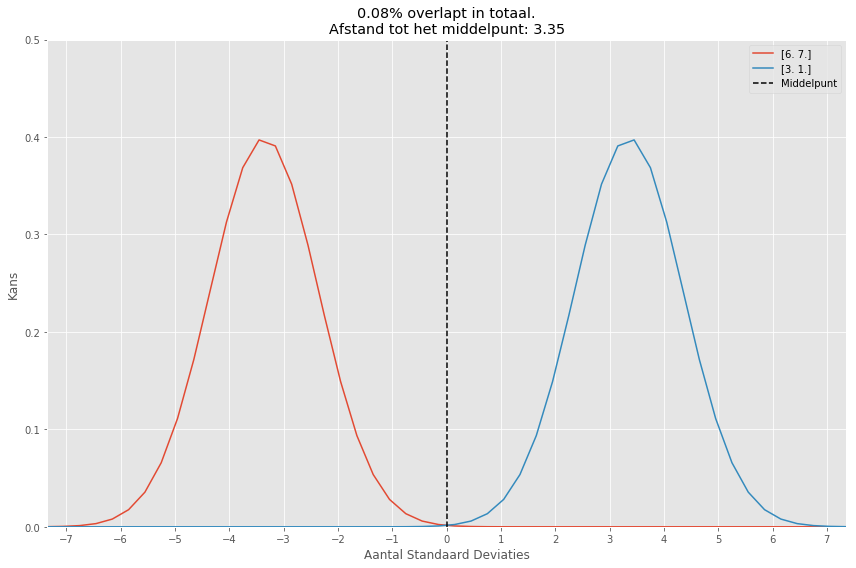

<IPython.core.display.Javascript object>

In [12]:
def berekenMiddelpuntAfstanden(punten):
    """Berekend de afstand tot het middelpunt voor iedere combinatie van twee punten.
       
       Gebaseerd op: https://github.com/scipy/scipy/blob/master/scipy/spatial/_plotutils.py"""
    vor = Voronoi(punten)
    middelpuntAfstanden = []
    
    for punt in vor.ridge_points:
        middelpunt = vor.points[punt].mean(axis=0)
        middelpuntAfstand = np.sqrt(  # Wortel van (A^2 + B^2)
                                np.sum(  # A^2 + B^2
                                    np.square(  # Macht van A en B
                                        middelpunt - vor.points[punt][0])))  # (ΔA, ΔB)
        middelpuntAfstanden.append(middelpuntAfstand)
    return middelpuntAfstanden

def plotAlleNormaleVerdelingen(punten):
    """Plot de normale verdelingen van alle mogelijke combinaties van punten.
        Returned de afstand tot het middelpunt van alle combinaties.
        Een zichtbare Vonoroi is niet nodig om berekeningen uit te voeren."""
    
    vor = Voronoi(punten)
    middelpuntAfstanden = berekenMiddelpuntAfstanden(punten)
    
    for i, punt in enumerate(middelpuntAfstanden):
        normaleVerdeling(0, 1, punt*2, vor.points[vor.ridge_points[i]])


punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(10, size=(8, 2))

plotAlleNormaleVerdelingen(punten)

### Voronoi met middelpunten en percentage overlap

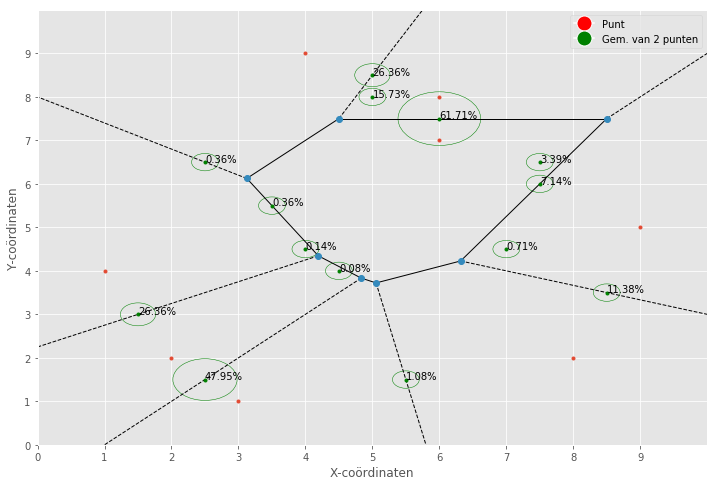

<IPython.core.display.Javascript object>

In [13]:
def plotVonoroiTotaal(punten):
    """Plot een Vonoroi-diagram ter grote van de maximale x en y-coördinaten.
       Bij ieder middelpunt is het %-overlap te zien en het daarbijbehordende bereik."""
    middelpuntAfstanden = berekenMiddelpuntAfstanden(punten)
    vor = Voronoi(punten)
    vorPlot(vor)
    ax = plt.gca()

    i = 0
    for i, punt in enumerate(vor.ridge_points):
        middelpunt = vor.points[punt].mean(axis=0)
        totaleOverlap = norm.cdf(-middelpuntAfstanden[i]) * 2  # Werkt alleen voor Standaard(!) Normale Verdeling
        
        ax.add_artist(   # Moet een ellipse worden
            plt.Circle((middelpunt[0], middelpunt[1]), max(0.2, totaleOverlap), color="green", fill=False))  # WIP cirkelgrootte
        plt.text(middelpunt[0], middelpunt[1], f"{round(totaleOverlap * 100, 2)}%")
        plt.plot([middelpunt[0]], [middelpunt[1]], marker='o', markersize=3, color="green")


    plt.xlim(0, max(punten[:, 0]) + 1)
    plt.ylim(0, max(punten[:, 1]) + 1)
    plt.xticks(np.arange(0, max(punten[:, 0]) + 1))
    plt.yticks(np.arange(0, max(punten[:, 1]) + 1))
    plt.xlabel("X-coördinaten")
    plt.ylabel("Y-coördinaten")
    legenda=[mlines.Line2D([0], [0], marker='o', color='w', label='Punt',
                          markerfacecolor='r', markersize=15),
            mlines.Line2D([0], [0], marker='o', color='w', label='Gem. van 2 punten',
                          markerfacecolor='g', markersize=15)]
    plt.legend(handles=legenda)
    plt.show()
    

punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(10, size=(8, 2))

plotVonoroiTotaal(punten)